In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('delivery_time3.csv')
df

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,DT,ST
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.shape

(21, 2)

In [6]:
df.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


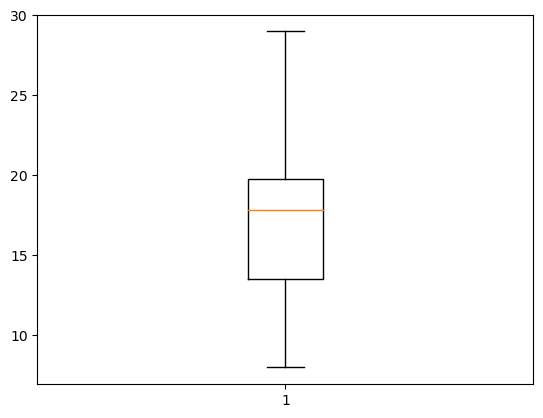

In [7]:
plt.boxplot(df.DT)
plt.show()

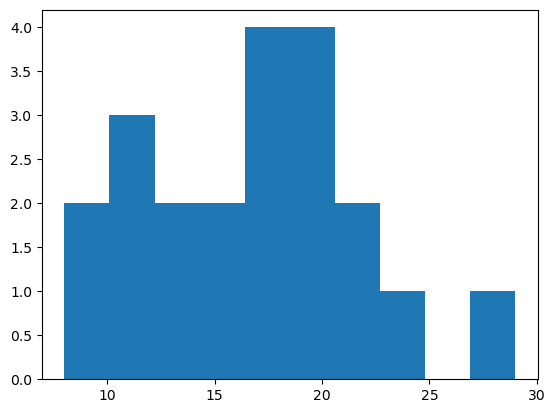

In [8]:
plt.hist(df.DT)
plt.show()

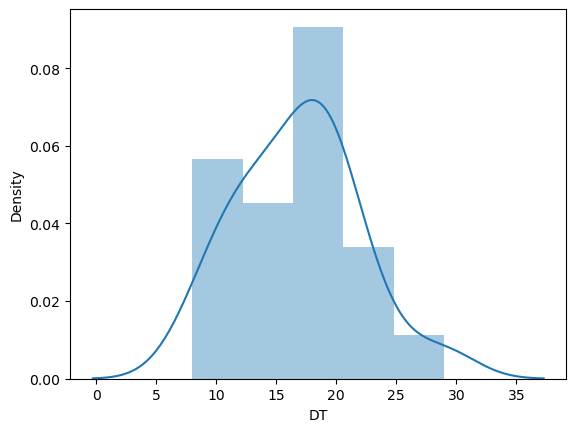

In [9]:
sn.distplot(df.DT)
plt.show()

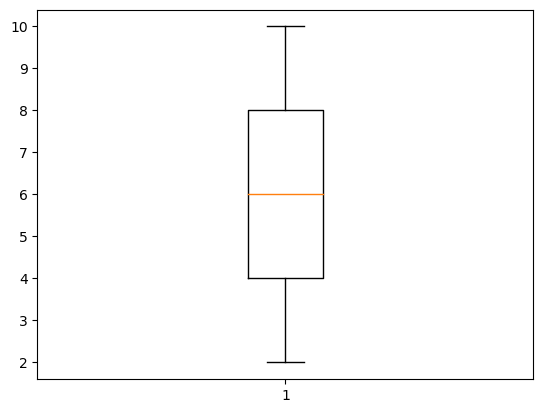

In [10]:
plt.boxplot(df.ST)
plt.show()

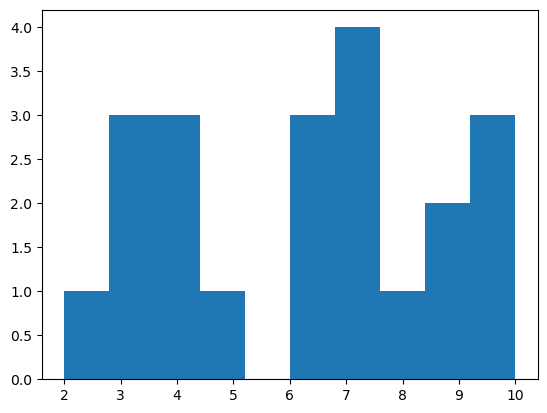

In [11]:
plt.hist(df.ST)
plt.show()

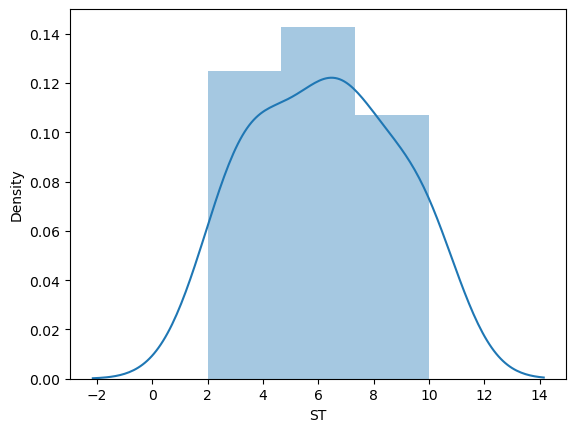

In [12]:
sn.distplot(df.ST)
plt.show()

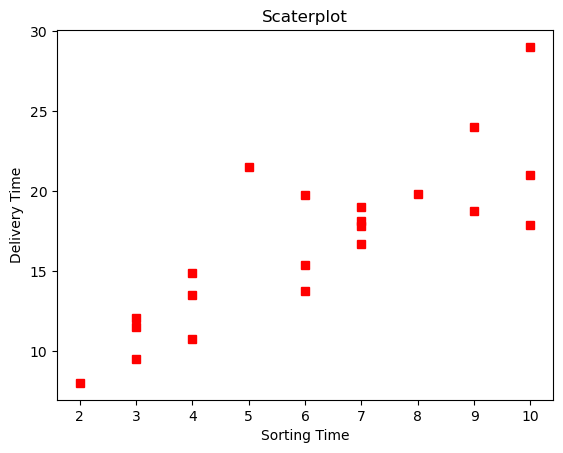

In [13]:
plt.plot(df.ST, df.DT, "rs")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("Scaterplot")
plt.show()

In [14]:
model=smf.ols('DT~ST', data=df).fit()
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        14:20:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [17]:
pred=model.predict(df.ST)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [18]:
model.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [19]:
rmse_lin=np.sqrt(np.mean((np.array(df['DT'])-np.array(pred))**2))
rmse_lin

2.7916503270617654

Text(0, 0.5, 'Delivery Time')

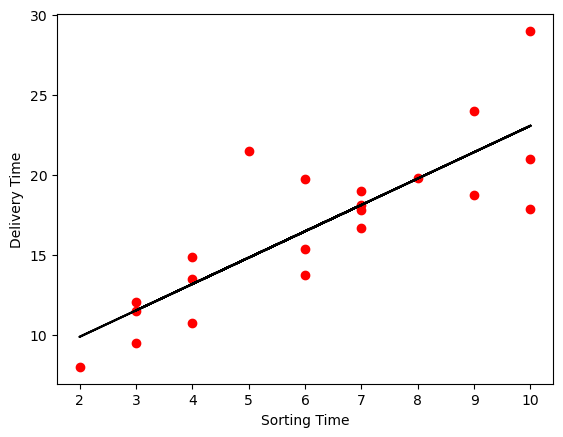

In [20]:
plt.scatter(x=df['ST'],y=df['DT'], color='red')
plt.plot(df['ST'],pred, color='black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [21]:
#modify the model to get more accuracy 
model2=smf.ols('DT~np.log(ST)',data=df).fit()
model2.params

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [22]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        14:20:05   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model2.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [24]:
model2.resid_pearson

array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [25]:
pred2=model2.predict(pd.DataFrame(df.ST))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [26]:
pred2
rmse_log=np.sqrt(np.mean((np.array(df.DT)-np.array(pred))**2))
rmse_log

2.7916503270617654

In [27]:
pred2.corr(df.DT)

0.8339325279256244

Text(0, 0.5, 'Delivery Time')

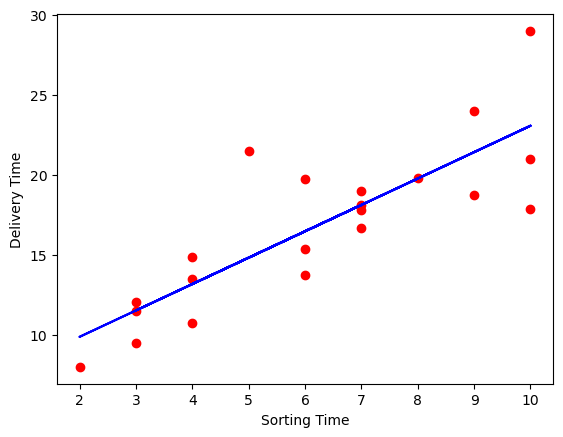

In [28]:
plt.scatter(x=df.ST, y=df.DT, color="red")
plt.plot(df.ST, pred, color="blue")
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [29]:
#futher modifying the model 
model3=smf.ols('np.log(DT)~ST', data=df).fit()
model3.params

Intercept    2.121372
ST           0.105552
dtype: float64

In [30]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.59e-06
Time:                        14:20:05   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model3.resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [32]:
model3.resid_pearson

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

In [33]:
pred_log=model3.predict(pd.DataFrame(df.ST))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [34]:
pred3=np.exp(pred_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [35]:
rmse_exp=np.sqrt(np.mean((np.array(df.DT)-np.array(pred3))**2))
rmse_exp

2.940250323056201

In [36]:
pred3.corr(df.DT)

0.808578010828926

Text(0, 0.5, 'Delivery Time')

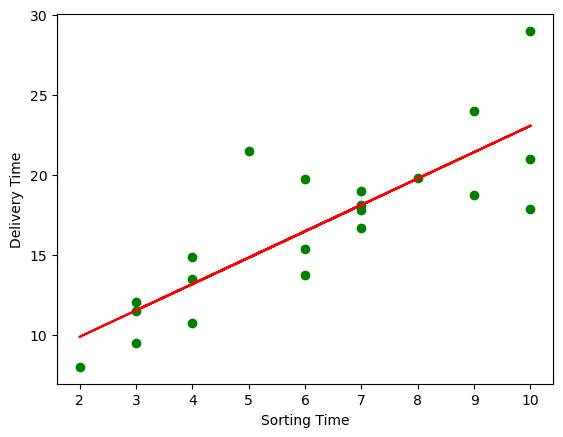

In [37]:
plt.scatter(x=df.ST, y=df.DT, color="green")
plt.plot(df.ST, pred, color="red")
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [38]:
df["ST_sq"]= df.ST*df.ST
df

,DT,ST,ST_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [39]:
model_quad=smf.ols('np.log(DT)~ST+ST_sq',data=df).fit()
model_quad.params

Intercept    1.699704
ST           0.265922
ST_sq       -0.012841
dtype: float64

In [45]:
model_quad.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [46]:
model_quad.resid_pearson

array([-0.18653701,  0.27510944,  0.92331151,  0.76937448,  1.79789238,
       -0.62623272,  0.0766711 , -0.80301506, -1.16851536, -0.74833548,
       -0.11118848, -1.12531927, -0.72398172,  0.37160353,  0.64861345,
        0.8734897 , -1.3029903 , -0.21828016, -0.61938087, -0.31407821,
        2.21178906])

In [40]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.20e-06
Time:                        14:20:06   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
ST_sq         -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
pred_quad=model_quad.predict(df)
pred4=np.exp(pred_quad)
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [42]:
rmse_quad=np.sqrt(np.mean((np.array(df.DT)-np.array(pred4))**2))
rmse_quad

2.799041988740925

Text(0, 0.5, 'Delivery Time')

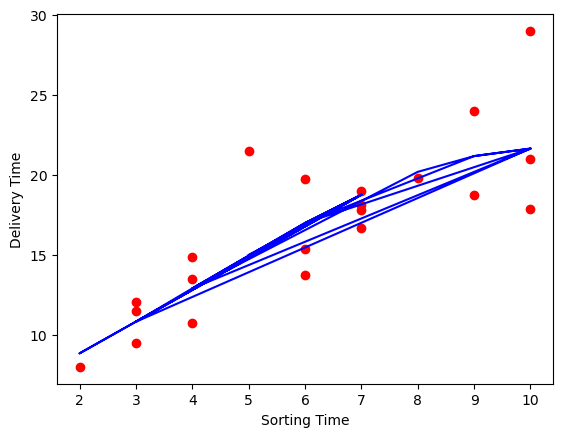

In [43]:
plt.scatter(df.ST, df.DT, color="red")
plt.plot(df.ST,pred4, color="blue")
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

Text(0, 0.5, 'standerdized residual')

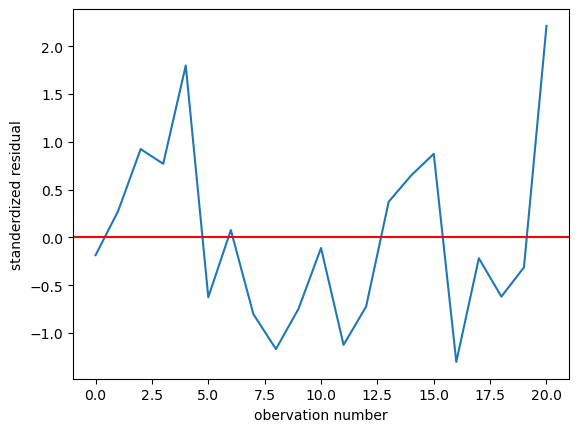

In [44]:
plt.plot(np.arange(21),model_quad.resid_pearson)
plt.axhline(y=0,color="r")
plt.xlabel("obervation number")
plt.ylabel("standerdized residual")

In [47]:
model5=smf.ols('np.log(DT)~np.log(ST)', data=df).fit()

In [48]:
model5.params

Intercept     1.741987
np.log(ST)    0.597522
dtype: float64

In [50]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.60e-07
Time:                        14:42:49   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
np.log(ST)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
pred_l=model5.predict(pd.DataFrame(df.ST))

In [53]:
pred_l

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [55]:
pred5=np.exp(pred_l)
pred5

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

In [57]:
rmse=np.sqrt(np.mean((np.array(df.DT)-np.array(pred5))**2))
rmse

2.7458288976145497

In [58]:
pred5.corr(df.DT)

0.833146471643729

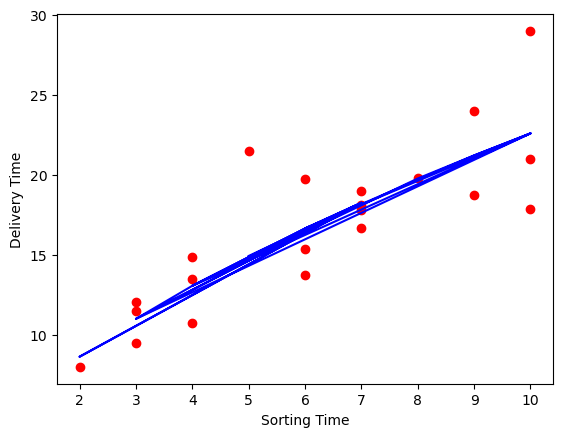

In [60]:
plt.scatter(df.ST, df.DT, color="r")
plt.plot(df.ST, pred5, color="b")
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [62]:
newdata=pd.Series([15,20,25])
data_pred=pd.DataFrame(newdata,columns=['ST'])
x=model5.predict(data_pred)

In [63]:
np.exp([x])

array([[28.79228735, 34.19242105, 39.06931074]])